In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import re
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#Importing the data
def readFile(f='C:/BU/DSC550/wk8-9/data/categorized-comments.jsonl'):
    df = pd.read_json(f, lines=True)
    return df
    
df_categorized_comments = readFile()
print(df_categorized_comments.count())
df_categorized_comments.head(10)

cat    606475
txt    606475
dtype: int64


,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!
5,sports,Ding dong the Kaepers gone!!!!!! Yes!!!! Frida...
6,sports,yup\n\nThat would be best case scenario. Still...
7,sports,I think Larry Kruger made a good point on KNBR...
8,sports,This is great to have two well-regarded RB coa...
9,sports,7-9 next season confirmed.


In [3]:
#selecting 10% of randomly sampled from each categoty to reduce the size of the dataset
dflist = [] # empty list
for cat in np.unique(df_categorized_comments['cat']):
    dflist.append(df_categorized_comments[df_categorized_comments['cat'] == cat].sample(frac = 0.10)) # iterating through each category and appending sample data to dataframe
df_categorized_comments = pd.concat(dflist)
del dflist

In [4]:
#Cleaning the text by removing punctuation and stopwords and stemming

stemmer = SnowballStemmer('english')
words = stopwords.words('english')

df_categorized_comments['cleaned_txt'] = df_categorized_comments['txt'].apply(lambda x: ' '.join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# deleting the txt field
del df_categorized_comments['txt']
df_categorized_comments.head(10)

,cat,cleaned_txt
28365,science_and_technology,you mean garbag devic the g overh bootloop pos...
12461,science_and_technology,holi shit i doubl take
25769,science_and_technology,googl product suck say guy exclus stream deal ...
10191,science_and_technology,consid one along moto z play w batteri mod
27063,science_and_technology,splurg xz i better camera plain x
4523,science_and_technology,can get work i select mantoux earth click set ...
18181,science_and_technology,oracl make money hand fist if lose someon use ...
12682,science_and_technology,this also reason i end appl ecosystem
12665,science_and_technology,realli the placement nexus p other scanner bac...
26254,science_and_technology,pixel launcher next question


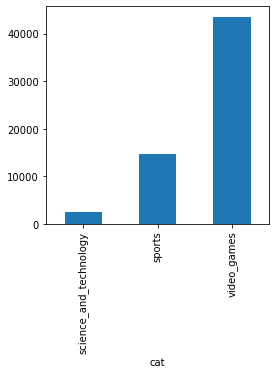

In [5]:
# plot to visualize the categories
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
df_categorized_comments.groupby('cat').cleaned_txt.count().plot.bar(ylim=0)
plt.show()
# deleting the unwanted content for faster execution before moving to the step of train and test




In [6]:
#Generating a TFIDF matrix from the cleaned text 

count = TfidfVectorizer()
X = count.fit_transform(df_categorized_comments['cleaned_txt']).toarray()

In [7]:
#Splitting the dataset into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, df_categorized_comments['cat'], test_size = 0.3)


In [8]:
#Turning the categorical target vectors into numerical vectors

y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes
num_classes=3
import tensorflow as tf
from keras import utils as np_utils 

y_train =  tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [9]:
input_dim=X_train.shape[1]
input_dim

28886

# 2. Neural Network Classifier with Keras

In [12]:
#Defining a function to build, train, and test the model with 4 layers

def build_network(X_train, y_train, X_test, batch_size, epochs): 
    """ 
    Create a function that returns 
    a compiled neural network 
    """ 
    nn = Sequential() 
    nn.add(Dense(500, activation ='relu', input_dim=X_train.shape[1])) 
    nn.add(Dense(3, activation='softmax'))
    nn.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy']) 
    
   #Fitting the model to the training data
    nn.fit(X_train, y_train, batch_size = batch_size, epochs = epochs)
    
    #Testing the model on the testing set and returning the predictions
    y_pred = np.argmax(nn.predict(X_test), axis = 1)
    return y_pred

In [13]:

#Running the model function
y_pred = build_network(X_train, y_train, X_test, 4096, 5)

Epoch 1/5
11/11 [==============================] - 20s 678ms/step - loss: 1.0350 - accuracy: 0.6277
Epoch 2/5
11/11 [==============================] - 8s 749ms/step - loss: 0.7763 - accuracy: 0.7180
Epoch 3/5
11/11 [==============================] - 8s 738ms/step - loss: 0.6320 - accuracy: 0.7271
Epoch 4/5
11/11 [==============================] - 8s 762ms/step - loss: 0.5407 - accuracy: 0.7771
Epoch 5/5
11/11 [==============================] - 8s 742ms/step - loss: 0.4726 - accuracy: 0.8354


In [19]:
f1 = f1_score(y_test, y_pred.ravel())
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
accuracy = text_clf.score(X_test, y_test)
#confusion_matrix=confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
# gave up with this error. tried fixing the issue resulting in memory issues and slowness of laptop. to handle multilabel-indicator i have used .ravel() but still no luck 